# Diabetes Patients Analysis & Prediction

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

#### Importing Data

In [2]:
Data = pd.read_csv("diabetes.csv")
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [104]:
# Dimensions of the dataframe
Data.shape

(768, 9)

In [105]:
# Display information about the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [106]:
# Calculate the number of missing values for each column
missing_values = Data.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### Data Visualization

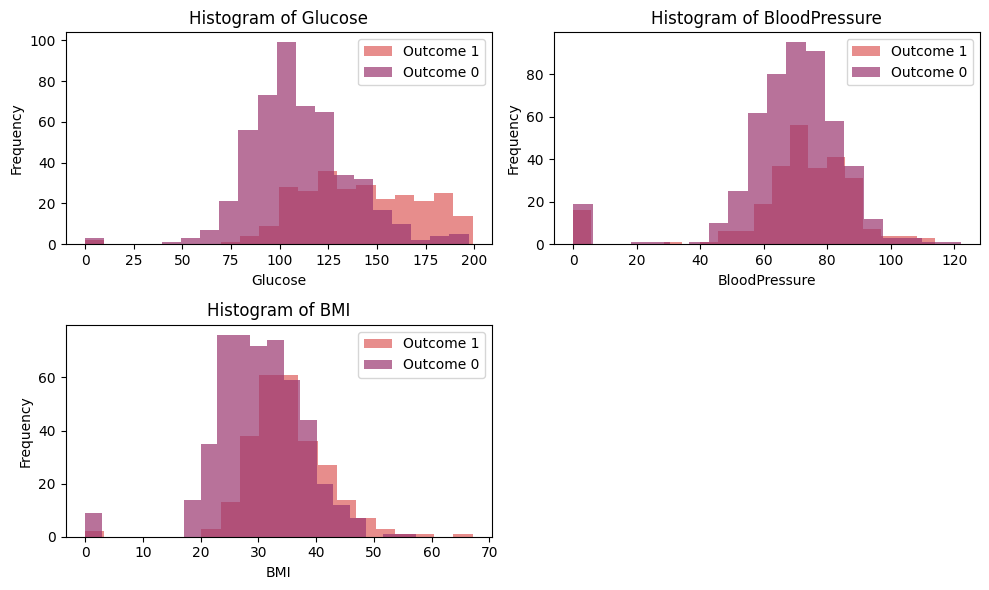

In [6]:
# List of numeric variables to create histograms for
numeric_variables = ['Glucose', 'BloodPressure', 'BMI']
outcomes = Data['Outcome'].unique()
custom_palette = sns.color_palette("flare", n_colors=len(outcomes))

plt.figure(figsize=(10, 6))
rows, cols = 2, 2

for i, var in enumerate(numeric_variables):
    plt.subplot(rows, cols, i + 1)
    for j, outcome in enumerate(outcomes):
        plt.hist(Data[Data['Outcome'] == outcome][var], bins=20, alpha=0.7, label=f'Outcome {outcome}', color=custom_palette[j])
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

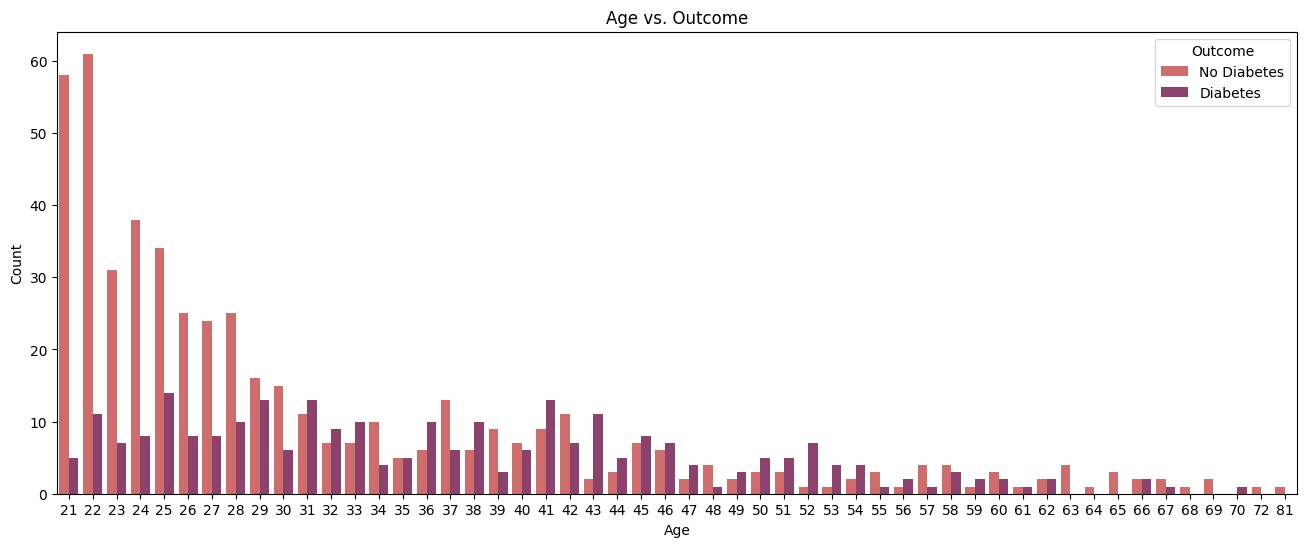

In [7]:
# Create a countplot of Age vs. Outcome
plt.figure(figsize=(16, 6))
sns.countplot(x='Age', hue='Outcome', data=Data, palette='flare')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age vs. Outcome')
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()


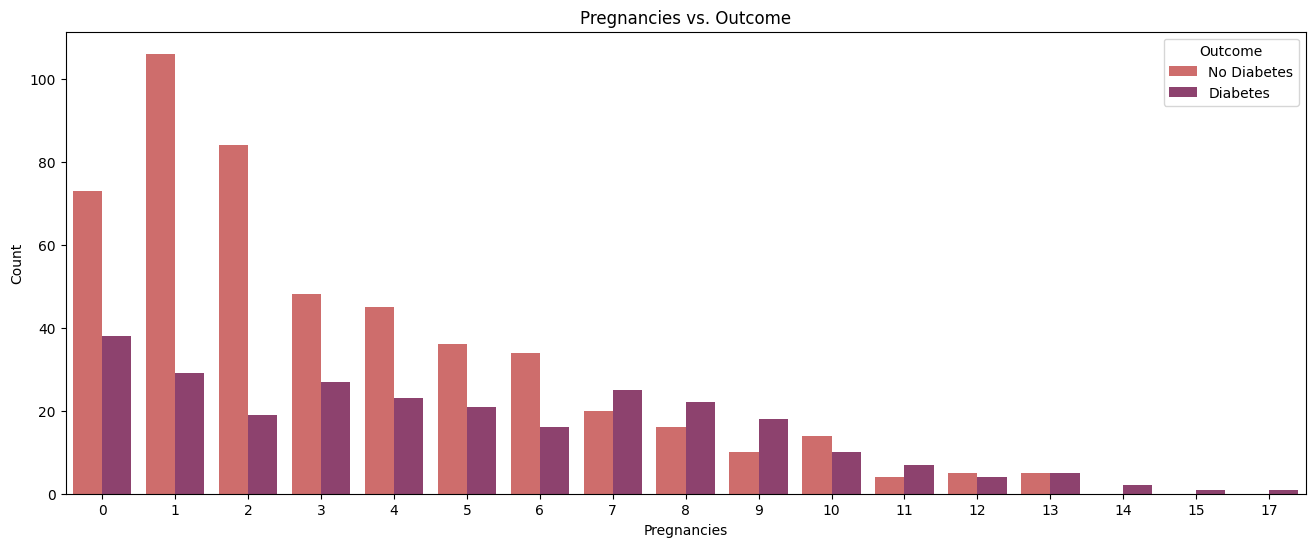

In [8]:
# Create a countplot of Pregnancies vs. Outcome
plt.figure(figsize=(16, 6))
sns.countplot(x='Pregnancies', hue='Outcome', data=Data, palette='flare')

plt.xlabel('Pregnancies')
plt.ylabel('Count')
plt.title('Pregnancies vs. Outcome')
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()


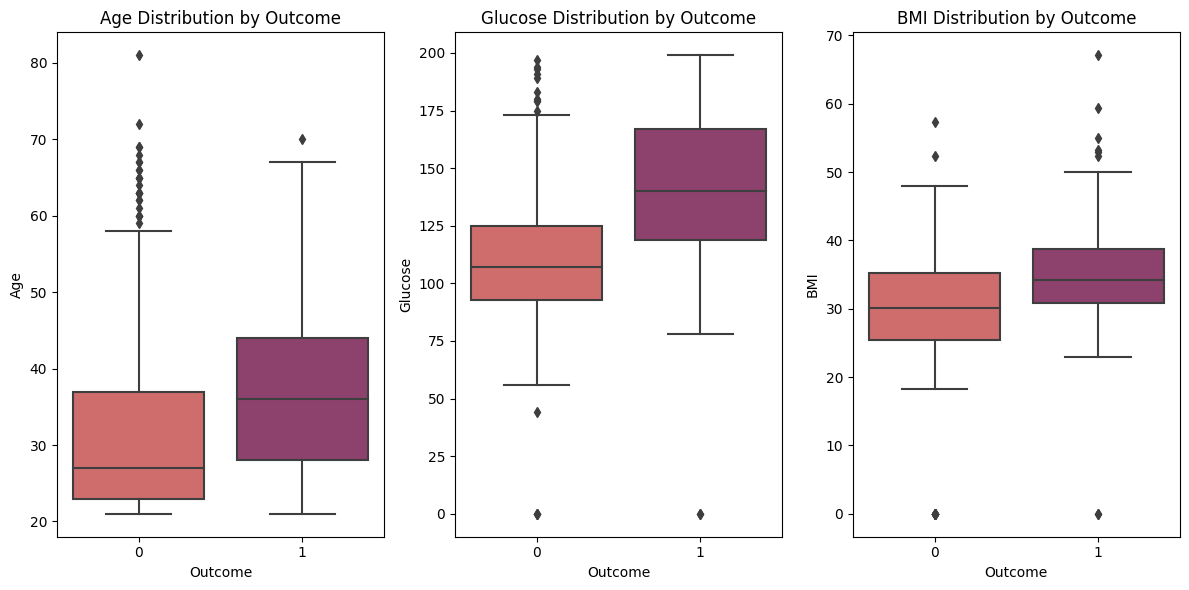

In [109]:
# Create a grid of box plots for Age, Glucose, and BMI by Outcome
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)  # Subplot for Age
sns.boxplot(x='Outcome', y='Age', data=Data, palette='flare')
plt.title('Age Distribution by Outcome')

plt.subplot(1, 3, 2)  # Subplot for Glucose
sns.boxplot(x='Outcome', y='Glucose', data=Data, palette='flare')
plt.title('Glucose Distribution by Outcome')

plt.subplot(1, 3, 3)  # Subplot for BMI
sns.boxplot(x='Outcome', y='BMI', data=Data, palette='flare')
plt.title('BMI Distribution by Outcome')

plt.tight_layout()
plt.show()


Correlation matrix

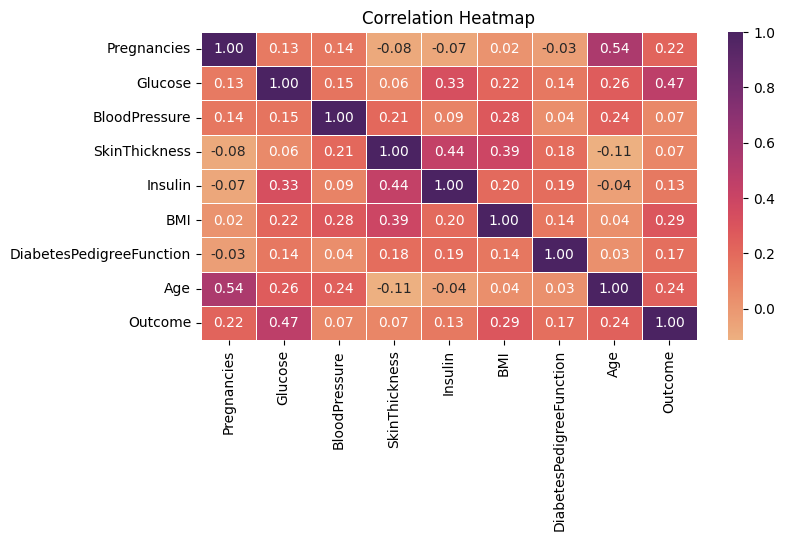

In [110]:
# Calculate the correlation matrix
correlation_matrix = Data.corr()

plt.figure(figsize=(8, 4))
custom_cmap = sns.color_palette("flare", as_cmap=True)

sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, linewidths=0.5, fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()

Feature Importance Plot

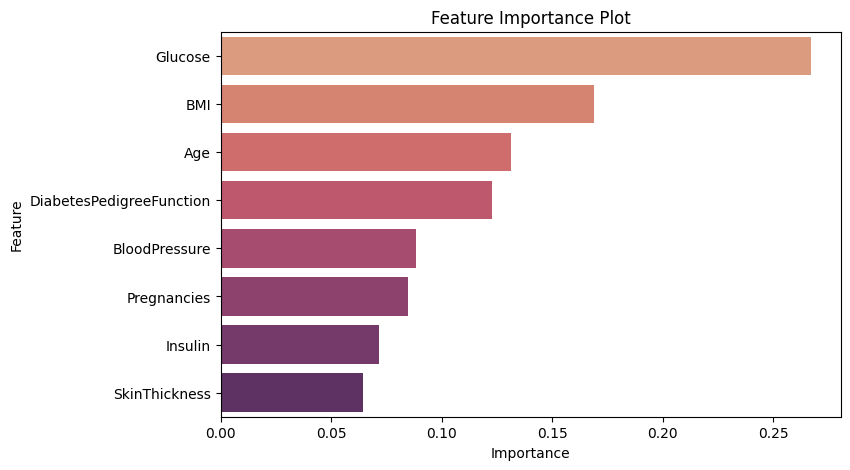

In [111]:
X = Data.drop(columns=['Outcome'])
y = Data['Outcome']
# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)
feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='flare')
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [112]:
# Calculate the count of patients with and without diabetes in the "Outcome" column
value_counts = Data["Outcome"].value_counts()
# Define labels for the two outcomes
labels = ["Patients without diabetes", "Patients with diabetes"]

for label, count in zip(labels, value_counts):
    print(f"{label}: {count}")

Patients without diabetes: 500
Patients with diabetes: 268


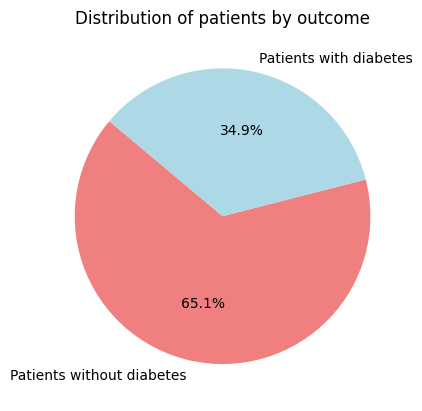

In [113]:
# Visualize the distribution of patients by outcome
colors = ['lightcoral', 'lightblue']
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Distribution of patients by outcome")

plt.show()

Data balancing is required because there is a significant class imbalance in the dataset. 

We have 500 samples from patients without diabetes and 268 samples from patients with diabetes. 

Balancing the data ensures that the model is not biased towards the majority class and can make accurate predictions for both classes.

#### Data Balancing

Oversampling

In [114]:
# Resample class 1 (Patients with diabetes) to have the same number of samples as class 0 (Patients without diabetes)
class_0 = Data[Data['Outcome'] == 0]
class_1 = Data[Data['Outcome'] == 1]

class_1_resampled = resample(class_1, n_samples=len(class_0), random_state=42)

balanced_dataset = pd.concat([class_0, class_1_resampled])

In [115]:
outcome_stats = balanced_dataset['Outcome'].value_counts()
print(outcome_stats)

total_samples = len(balanced_dataset)
percentage_0 = (outcome_stats[0] / total_samples) * 100
percentage_1 = (outcome_stats[1] / total_samples) * 100
print(f"Class 0 percentage : {percentage_0:.2f}%")
print(f"Class 1 percentage : {percentage_1:.2f}%")

Outcome
0    500
1    500
Name: count, dtype: int64
Class 0 percentage : 50.00%
Class 1 percentage : 50.00%


#### Data Spliting

In [116]:
# Define the independent variables (features) and the target variable (Outcome)
X = balanced_dataset.drop(columns=['Outcome'])  # Features
y = balanced_dataset['Outcome']  # Target

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(800, 8)
(200, 8)


#### Feature Scaling

In [117]:
# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-0.88507695, -1.62865682, -0.98356697, ..., -1.2247159 ,
        -0.69605713, -1.14597156],
       [-1.16683643, -0.02280312,  0.11441468, ...,  0.52087052,
        -0.66640866,  1.56121979],
       [ 1.08723937,  1.90422131, -0.28485137, ..., -1.18534177,
         0.561038  , -0.18535528],
       ...,
       [ 0.24196095, -0.85784704,  0.3140477 , ...,  0.42899755,
        -0.31062702,  1.56121979],
       [ 1.65075832,  1.22976276,  0.71331376, ..., -0.60785453,
        -0.89173704,  1.73587729],
       [-0.60331748, -1.14690071,  0.21423119, ..., -0.4372333 ,
        -0.75238923, -1.05864281]])

#### Diabetes Prediction Models

##### SVM classifier

In [118]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

In [119]:
# Train the SVM model on the training data
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
SVM_y_pred = svm_classifier.predict(X_test_scaled)

In [120]:
# Evaluate the model
SVM_accuracy = accuracy_score(y_test, SVM_y_pred) * 100
SVM_report = classification_report(y_test, SVM_y_pred)

# Print the evaluation results
print("Accuracy:", SVM_accuracy, "%")
print("Classification Report for SVM:\n", SVM_report)

Accuracy: 78.0 %
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78        96
           1       0.80      0.77      0.78       104

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



##### Gradient Boosting classifier

In [122]:
# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [123]:
# Train the Gradient Boosting model on the training data
gb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_gb = gb_classifier.predict(X_test_scaled)

In [124]:
# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb) * 100
report_gb = classification_report(y_test, y_pred_gb)

# Print the evaluation results
print("Gradient Boosting Accuracy:", accuracy_gb, "%")
print("Classification Report for Gradient Boosting:\n", report_gb)

Gradient Boosting Accuracy: 84.0 %
Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.86      0.79      0.83        96
           1       0.82      0.88      0.85       104

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



##### Random Forest classifier

In [125]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [126]:
# Train the Random Forest model on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test_scaled)

In [127]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
report_rf = classification_report(y_test, y_pred_rf)

# Print the evaluation results
print("Random Forest Accuracy:", accuracy_rf, "%")
print("Classification Report for Random Forest:\n", report_rf)

Random Forest Accuracy: 90.5 %
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90        96
           1       0.90      0.91      0.91       104

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200



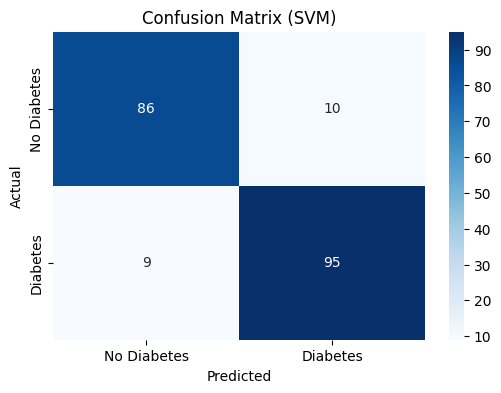

In [128]:
# Calculate the confusion matrix
SVM_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(SVM_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()

Save the model

In [129]:
# Save the trained Random Forest model to a file
model_filename = 'random_forest_diabetes_model.joblib'
joblib.dump(rf_classifier, model_filename)

print(f"Random Forest model saved to {model_filename}")

Random Forest model saved to random_forest_diabetes_model.joblib


: 